<a href="https://colab.research.google.com/github/Bharathkrishnamurthy/21Day_21_ML-_project/blob/main/Day2_Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


step1: Import necessary library

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud


step2: Data loadng and initial inspection




In [74]:
!git clone "https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset"

fatal: destination path '21-Days-21-Projects-Dataset' already exists and is not an empty directory.


In [75]:
df=pd.read_csv('/content/21-Days-21-Projects-Dataset/Datasets/netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [76]:
df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [78]:
df.shape

(7787, 12)

step3:Data cleaning and tranformation

In [79]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2389
cast,718
country,507
date_added,10
release_year,0
rating,7
duration,0


In [80]:
# handling missing value of director,cast,country,rating
df['director']=df['director'].fillna('Unkown',inplace=False)
df['cast']=df['cast'].fillna('Unknown',inplace=False)
df['country']=df['country'].fillna(df['country'].mode()[0])


In [81]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,10
release_year,0
rating,7
duration,0


In [82]:
df.dropna(subset=['date_added','rating'],inplace=True)

In [83]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed',dayfirst=True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unkown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [84]:
# extracting year and month
df['year_added']=df['date_added'].dt.year
df['month_added']=df['date_added'].dt.month
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,TV Show,3%,Unkown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2018-12-20,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",2018,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2017-11-16,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",2017,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2020-01-01,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,2020,1


In [85]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,0
cast,0
country,0
date_added,0
release_year,0
rating,0
duration,0


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7770 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       7770 non-null   object        
 1   type          7770 non-null   object        
 2   title         7770 non-null   object        
 3   director      7770 non-null   object        
 4   cast          7770 non-null   object        
 5   country       7770 non-null   object        
 6   date_added    7770 non-null   datetime64[ns]
 7   release_year  7770 non-null   int64         
 8   rating        7770 non-null   object        
 9   duration      7770 non-null   object        
 10  listed_in     7770 non-null   object        
 11  description   7770 non-null   object        
 12  year_added    7770 non-null   int32         
 13  month_added   7770 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 849.8+ KB


step4:explanatory data analysis and visualization

4.1 what is content distibution type?

In [87]:
df['type'].value_counts()

,count
type,
Movie,5372
TV Show,2398


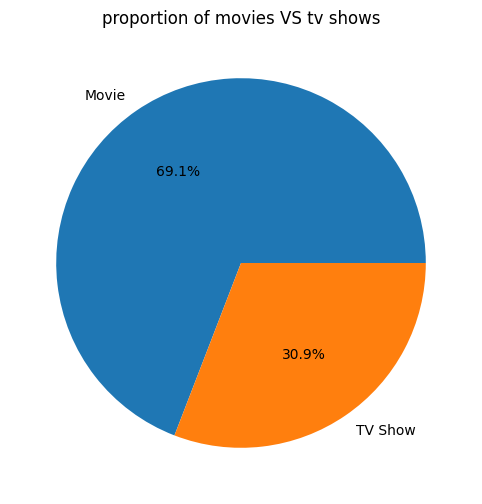

In [88]:
plt.figure(figsize=(8,6))
type_counts=df['type'].value_counts()
plt.pie(type_counts,labels=type_counts.index,autopct='%1.1f%%')
plt.title("proportion of movies VS tv shows")
plt.show()

insight:the netflix platform is dominated by movies upto 70% than the tv shows

4.2 How was the content been added over the time

<Figure size 1400x800 with 0 Axes>

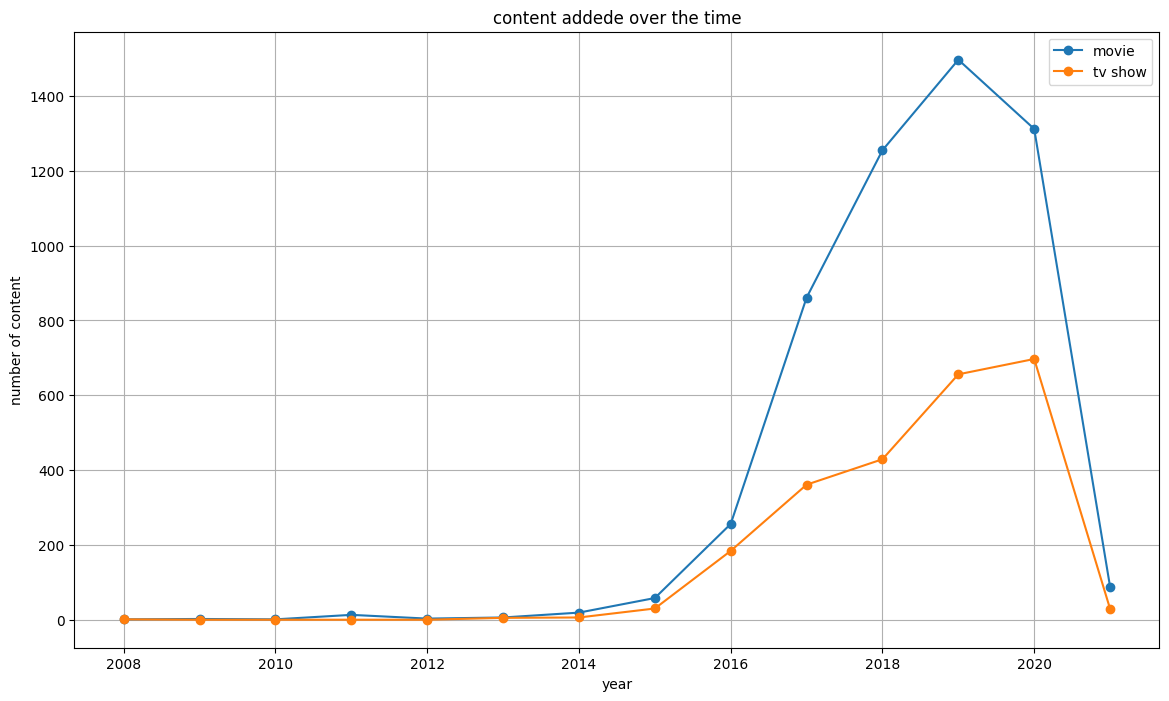

In [89]:
content_over_time=df.groupby(['year_added','type']).size().unstack().fillna(0)
plt.figure(figsize=(14,8))
content_over_time.plot(kind='line',marker='o',figsize=(14,8))
plt.title('content addede over the time')
plt.xlabel('year')
plt.ylabel('number of content')
plt.legend(['movie','tv show'])
plt.grid(True)
plt.show()


insights: from the year 2015 both the movies and tv shows incraeses slightly, at 2019 movies dominates the tv shows by 1400 more movies

4.3 what are the most popular genres?

In [90]:
df['listed_in'].value_counts()

,count
listed_in,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
Sports Movies,1
"Crime TV Shows, TV Horror, TV Mysteries",1
"Children & Family Movies, Classic Movies, Dramas",1


In [91]:
df['listed_in'].str.split(', ')

,listed_in
0,"[International TV Shows, TV Dramas, TV Sci-Fi ..."
1,"[Dramas, International Movies]"
2,"[Horror Movies, International Movies]"
3,"[Action & Adventure, Independent Movies, Sci-F..."
4,[Dramas]
...,...
7782,"[Dramas, International Movies]"
7783,"[Dramas, International Movies, Music & Musicals]"
7784,"[Documentaries, International Movies, Music & ..."
7785,"[International TV Shows, Reality TV]"


In [92]:
# split the listed in columns and explode it
genres=df.assign(genre=df['listed_in'].str.split(', ')).explode('genre')
genres.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,genre
0,s1,TV Show,3%,Unkown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,International TV Shows
0,s1,TV Show,3%,Unkown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Dramas
0,s1,TV Show,3%,Unkown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020-08-14,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020,8,TV Sci-Fi & Fantasy
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,Dramas
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016-12-23,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016,12,International Movies


In [93]:
top_genres=genres['genre'].value_counts().reset_index()
top_genres.columns=['genre','count']
top_genres.head()

,genre,count
0,International Movies,2437
1,Dramas,2105
2,Comedies,1471
3,International TV Shows,1197
4,Documentaries,786


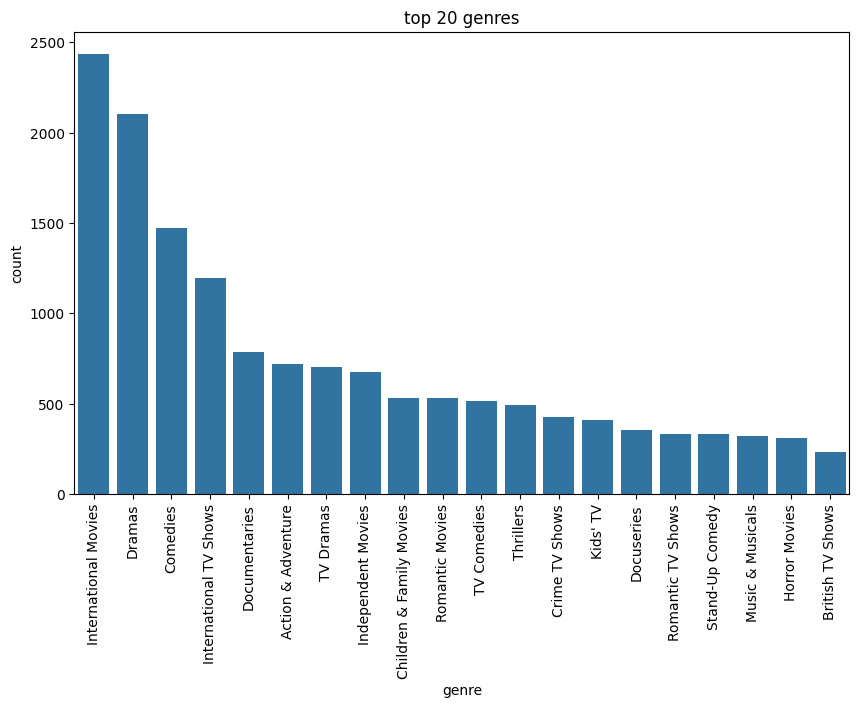

In [94]:
top_20_genres=top_genres.head(20)
plt.figure(figsize=(10,6))
sns.barplot(x='genre',y='count',data=top_20_genres)
plt.title('top 20 genres')
plt.xlabel('genre')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

insights: international movies are more popular genres in the netflix platform


4.5 Where does the content come from ?

In [95]:
df['country']

,country
0,Brazil
1,Mexico
2,Singapore
3,United States
4,United States
...,...
7782,"Sweden, Czech Republic, United Kingdom, Denmar..."
7783,India
7784,United States
7785,Australia


In [96]:
countries=df.assign(country=df['country'].str.split(', ')).explode('country')

top_countries_count=df['country'].value_counts().reset_index()
top_countries_count.columns=['country','count']
top_countries_count.head()

,country,count
0,United States,3051
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183


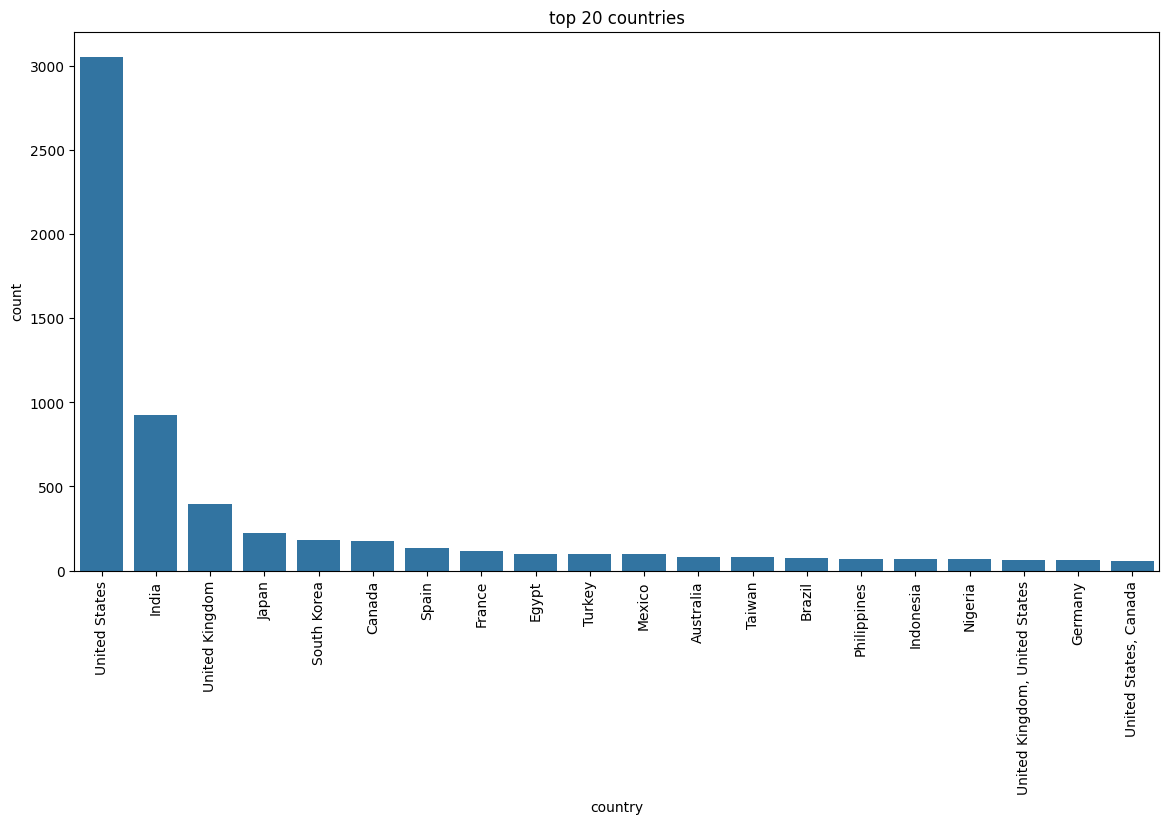

In [97]:
plt.figure(figsize=(14,7))
sns.barplot(x='country',y='count',data=top_countries_count.head(20))
plt.title('top 20 countries')
plt.xlabel('country')
plt.ylabel('count')
plt.xticks(rotation=90)
plt.show()

insights:usa produces the major content to netflix viewres,india is the next the usa and thene united kingdom whereas the germany and other uk states were the least content producers

4.6 what are the maturity rating content?


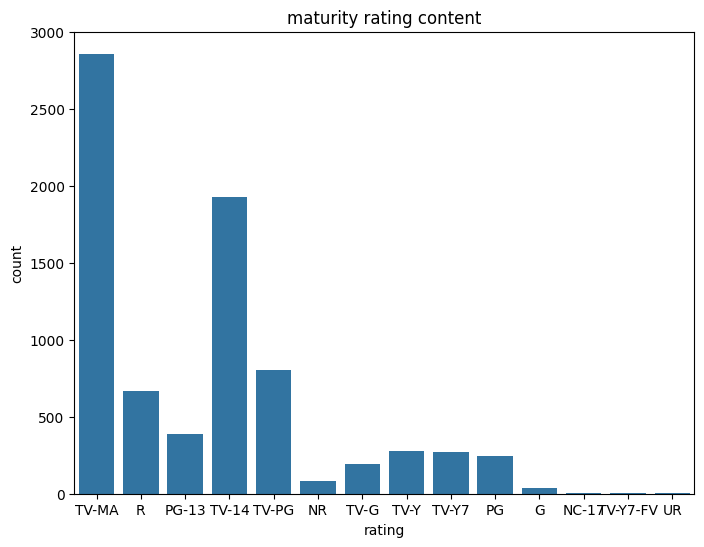

In [98]:
plt.figure(figsize=(8,6))
sns.countplot(x='rating',data=df)
plt.title('maturity rating content')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

step5:feature engineering _content freshness

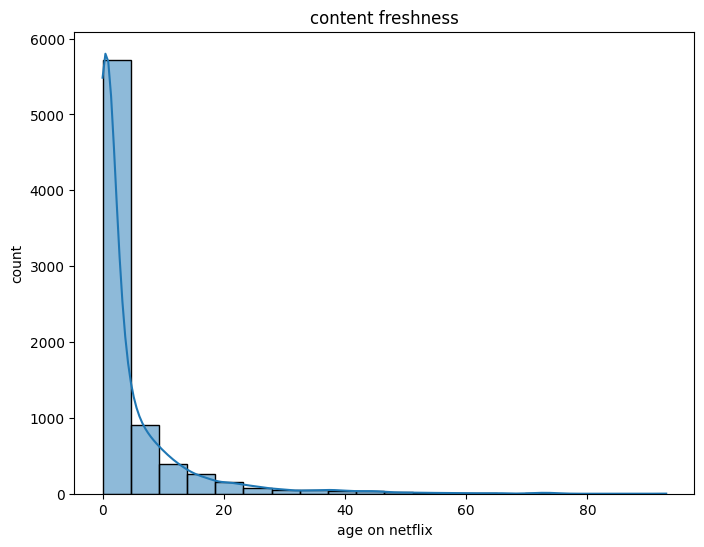

In [99]:
# creating the age on netflux
df['age_on_netflix']=df['year_added'] - df['release_year']

content_age=df[df['age_on_netflix']>=0]

plt.figure(figsize=(8,6))
sns.histplot(data=content_age,x='age_on_netflix',bins=20,kde=True)
plt.title('content freshness')
plt.xlabel('age on netflix')
plt.ylabel('count')
plt.show()

step6:Deeper multivariate analysis

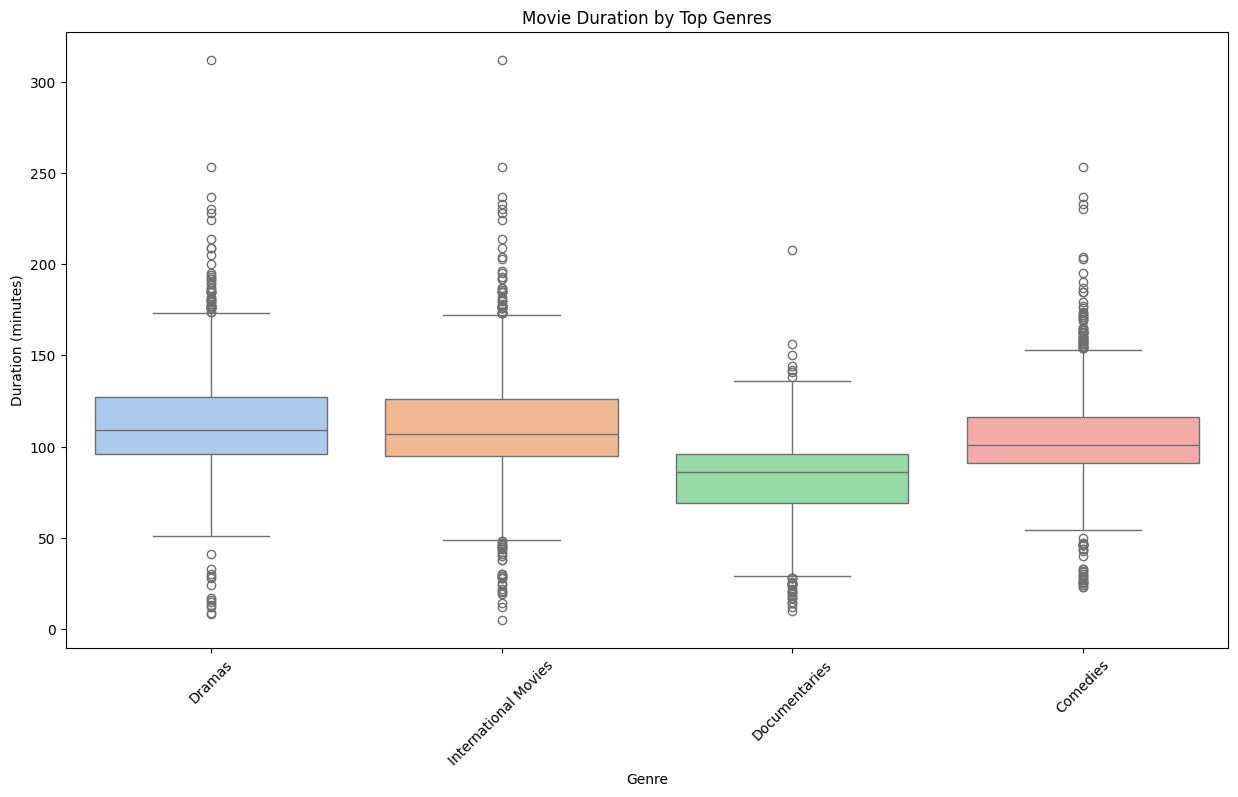

In [100]:
# Analyze movie duration across different top genres
top_genres = genres['genre'].value_counts().index[:5]
genres_movies = genres[(genres['type'] == 'Movie') & (genres['genre'].isin(top_genres))].copy()
genres_movies['duration_min'] = genres_movies['duration'].str.replace(' min', '').astype(int)

plt.figure(figsize=(15, 8))
sns.boxplot(data=genres_movies, x='genre', y='duration_min', palette='pastel', hue='genre', legend=False)
plt.title('Movie Duration by Top Genres')
plt.xlabel('Genre')
plt.ylabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.show()


Insight: While the median duration for most top genres is similar (around 90-100 minutes), we can see some interesting variations. For example, Dramas tend to have a wider range of durations, with many longer films. International Movies also show a broad distribution, reflecting diverse filmmaking styles from around the world.

Step 7: Word Cloud from Content Descriptions
As a final visual analysis, let's generate a word cloud from the description column to see what themes and words are most common in Netflix content.

In [101]:
df['description']

,description
0,In a future where the elite inhabit an island ...
1,After a devastating earthquake hits Mexico Cit...
2,"When an army recruit is found dead, his fellow..."
3,"In a postapocalyptic world, rag-doll robots hi..."
4,A brilliant group of students become card-coun...
...,...
7782,When Lebanon's Civil War deprives Zozo of his ...
7783,A scrappy but poor boy worms his way into a ty...
7784,"In this documentary, South African rapper Nast..."
7785,Dessert wizard Adriano Zumbo looks for the nex...


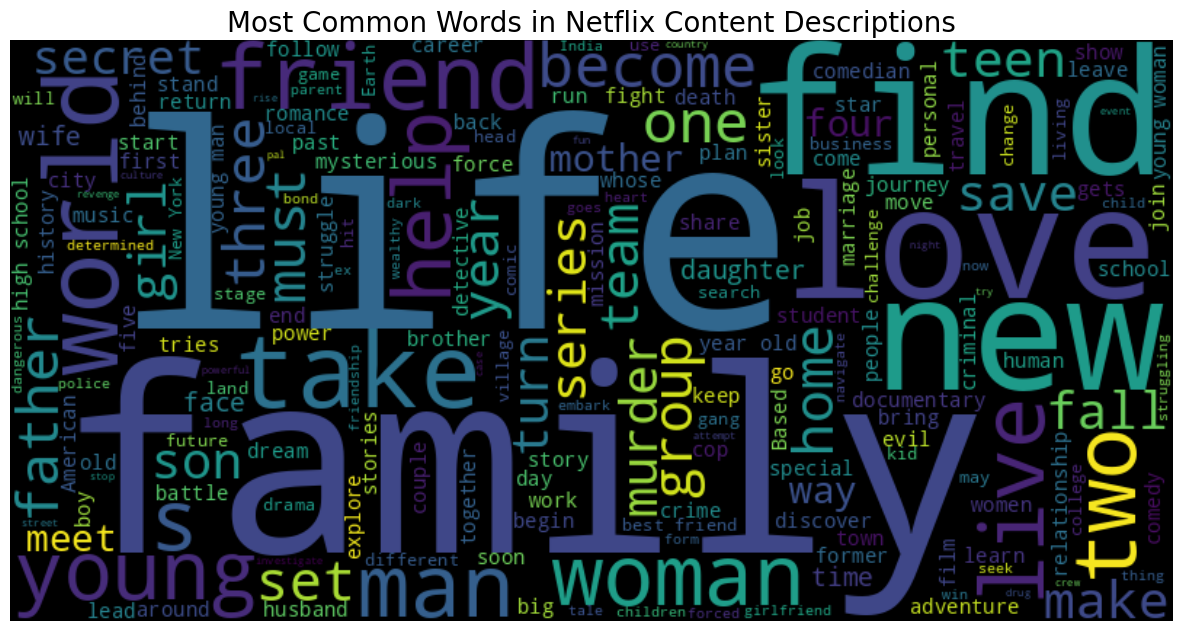

In [102]:
# Combine all descriptions into a single string
text = ' '.join(df['description'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Netflix Content Descriptions', fontsize=20)
plt.show()

Step 8: Final Conclusion and Summary of Insights
This in-depth EDA of the Netflix dataset has revealed several key characteristics and strategies of the platform's content library.

Key Findings:

Content Strategy: Netflix's library is movie-heavy (~70%), and the platform aggressively added content between 2016-2019. Their strategy involves a mix of brand new originals (added the same year they are released) and a deep library of licensed older content.
Global Dominance: While the US is the top content producer, the platform is heavily international, with India being a massive contributor. This is reflected in the top genres ("International Movies") and most frequent actors.

1. How has the distribution of content ratings changed over time?

<Axes: xlabel='year_added'>

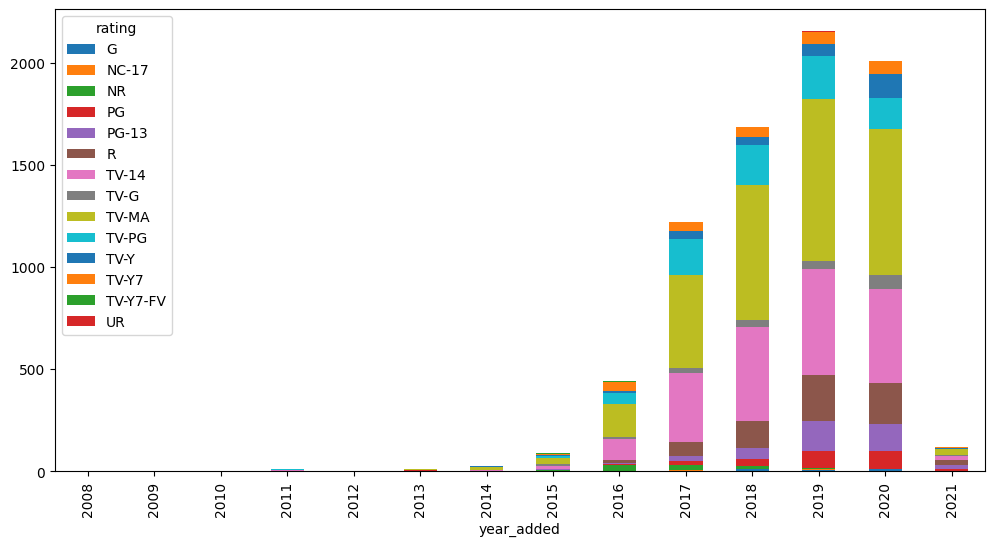

In [103]:
rating_trend = df.groupby(['year_added', 'rating']).size().unstack().fillna(0)
rating_trend.plot(kind='bar', stacked=True, figsize=(12,6))


Insights:
TV-MA content increased after 2016.
at 2019 has highest rating
Family-friendly content (PG, G) remained constant or declined.

2. Is there a relationship between content age and its type (Movie vs. TV Show)?


<Axes: xlabel='type', ylabel='age_on_netflix'>

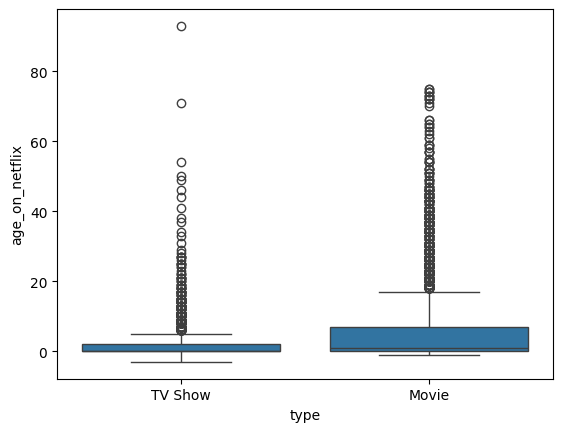

In [104]:
sns.boxplot(data=df, x='type', y='age_on_netflix')


Insights
Movies tend to be older when added (Netflix acquires older films).
TV Shows are often newer or exclusive (smaller age gap).

3. Trends in content production (Release year vs. Year added to Netflix)

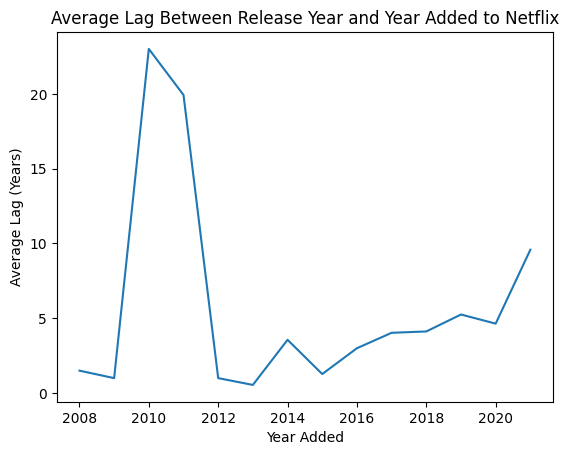

In [105]:
df['lag_years'] = df['year_added'] - df['release_year']
lag_trend = df.groupby('year_added')['lag_years'].mean().reset_index()
sns.lineplot(data=lag_trend, x='year_added', y='lag_years')
plt.title("Average Lag Between Release Year and Year Added to Netflix")
plt.xlabel("Year Added")
plt.ylabel("Average Lag (Years)")
plt.show()

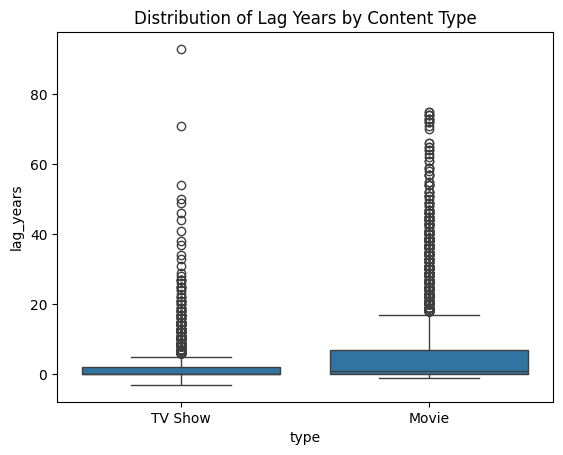

In [106]:
sns.boxplot(data=df, x='type', y='lag_years')
plt.title("Distribution of Lag Years by Content Type")
plt.show()

insights:
Netflix’s library grew rapidly after 2015.

Lag decreased from 6 years (early) to 1 year (recently).

Q4. Most common word pairs or phrases in content descriptions

In [107]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words='english', ngram_range=(2,2))
bigrams = cv.fit_transform(df['description'].dropna())
sum_bigrams = np.sum(bigrams.toarray(), axis=0)
common_phrases = sorted([(word, sum_bigrams[idx]) for word, idx in cv.vocabulary_.items()], key=lambda x: x[1], reverse=True)[:20]
common_phrases

[('high school', np.int64(133)),
 ('year old', np.int64(130)),
 ('young man', np.int64(103)),
 ('young woman', np.int64(98)),
 ('new york', np.int64(86)),
 ('small town', np.int64(59)),
 ('best friend', np.int64(51)),
 ('true story', np.int64(48)),
 ('stand special', np.int64(47)),
 ('world war', np.int64(46)),
 ('best friends', np.int64(45)),
 ('based true', np.int64(43)),
 ('documentary follows', np.int64(38)),
 ('los angeles', np.int64(38)),
 ('war ii', np.int64(38)),
 ('falls love', np.int64(37)),
 ('york city', np.int64(35)),
 ('documentary series', np.int64(35)),
 ('road trip', np.int64(33)),
 ('serial killer', np.int64(32))]

Insights:
Frequent phrases: “young woman,” “high school,” “best friends,” “true story” — showing youth & drama dominance.

5. Who are the top directors on Netflix?

<Axes: ylabel='director'>

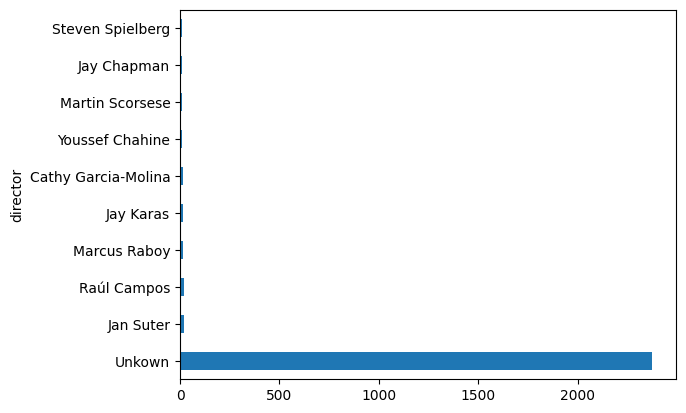

In [111]:
directors = df['director'].dropna().str.split(',').explode().str.strip()
top_directors = directors.value_counts().head(10)
top_directors.plot(kind='barh')

Insights:
Certain directors (e.g:Raúl Campos, Jay Karas) have multiple comedy specials.
Many “Unknown” entries imply missing metadata.